# Laboratório 5: Reamostragem e Bootstrapping [<img src="images/colag_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 6.5%;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/labs/Laborat%C3%B3rio%205%2FLaborat%C3%B3rio%205.ipynbLaborat%C3%B3rio%205%2FLaborat%C3%B3rio%205.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 3.25%;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/labs/Laborat%C3%B3rio%205%2FLaborat%C3%B3rio%205.ipynb)

Bem-vindo ao Laboratório 5! Nesta tarefa, desenvolveremos uma compreensão mais aprofundada sobre estimativa de parâmetros e inicialização.

Você deve concluir todo este laboratório e enviá-lo ao Moodle até às 23h59 da data de vencimento.

### Referências
- [CIT: Capítulos 9, 10 e 13](https://inferentialthinking.com/)
- Aulas: Tópicos 11, 12, 13 e 14. 

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [1]:
## Imports para esse laboratório
import numpy as np
import pandas as pd
import math

## Opções do MatplotLib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

## 1. Percentis 🅿️

#### **Pergunta 1.1.**

Digamos que você esteja em uma turma com 10 alunos e as notas de todos os alunos da turma estão armazenadas no `Array` `grades`. Sua pontuação é 84.

In [2]:
grades = np.array([56, 65, 67, 72, 74, 78, 78, 80, 84, 94])

Qual das seguintes afirmações são **verdadeiras**? Utilizando a _definição_ de percentil, preencha as respostas correspondentes na célula de texto seguinte.

**A**. A pontuação mais alta está no percentil 100.

**B**. Sua pontuação é superior ao percentil 80.

**C**. Sua pontuação é inferior ao percentil 81.

**D**. Sua pontuação está no percentil 86.

**E**. Uma pontuação de 78 está no percentil 50.

> **A** e **B**.

#### **Pergunta 1.2.**

Use a função `np.percentile` para calcular o percentil 50 de `grades` e salve o resultado como `p_50`.

In [3]:
p_50 = np.percentile(grades, 50)
p_50

76.0

#### **Pergunta 1.3.**

Use `np.median` para calcular a mediana de `grades` e salve o resultado como `median_grade`.

In [4]:
median_grade = np.median(grades)
median_grade

76.0

#### **Pergunta 1.4.**

Compare **manualmente** as respostas das Perguntas 1.3. e 1.4.  Defina a variável `same` como `True` se os dois valores forem iguais, e `False` se forem diferentes.

_<ins> Desafio</ins>_: tente não usar if/else aqui!

In [5]:
same = (p_50 == median_grade)
same

True

## 2. Preliminares da Inteligência Aliada 🧠

Ao longo deste laboratório, estudaremos um problema estatístico conhecido como [German tank problem](https://en.wikipedia.org/wiki/German_tank_problem).

Na Segunda Guerra Mundial, os Aliados (liderados pelos EUA, Reino Unido e União Soviética) queriam saber quantos tanques militares os alemães tinham produzido. No entanto, eles não conseguiam ter acesso aos dados dessa produção – tudo o que conseguiam observar era apenas uma **amostra** aleatória de tanques capturados em batalha.

Para definir o problema de maneira mais precisa, suponha então que os tanques produzidos recebiam números de série (_serial numbers_) que variavam de 1 a `N`, onde `N` era o número total de tanques produzidos. Os Aliados estavam então tentando estimar `N` (um **parâmetro populacional**) utilizando os números de série dos tanques capturados (sua amostra). 

Neste laboratório, assumiremos que a amostra dos Aliados era uma **amostra aleatória simples** da população de tanques produzidos (lembre-se: isso significa que cada elemento era amostrado de maneira independente, uniforme e _sem reposição_).

<br>

<center><img src='https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/labs/Laborat%C3%B3rio%205/images/tank.jpg' width=400></center>

<br>

#### **Pergunta 2.1.** 

Se calcularmos uma estimativa de `N` com base na nossa amostra, essa quantidade é um _parâmetro_ ou uma _estatística_? Preencha a célula de texto seguinte com as afirmativas **verdadeiras**.

**A**. `N` é um parâmetro, e logo uma estimativa para `N` calculada com base na amostra também é um parâmetro.

**B**. `N` é um parâmetro, e uma estimativa para `N` calculada com base na amostra é uma estatística.

**C**. `N` é uma estatística, e uma estimativa para `N` calculada com base na amostra é um parâmetro.

**D**. `N` é uma estatística, e logo uma estimativa para `N` calculada com base na amostra também é uma estatística.

> **B**.

Para tornarmos o problema considerado nesse laboratório mais realista, suponha que aqui não tenhamos acesso ao número verdadeiro `N` de tanques produzidos pelos alemães, mas apenas uma amostra aleatória simples dos números de série dos tanques capturados pelos Aliados.

Esses números de série estão contidos no DataFrame `observations` abaixo.

In [6]:
observations = pd.read_csv("https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/labs/Laborat%C3%B3rio%205/data/serial_numbers.csv")
num_observations = observations.shape[0]
observations

,serial_number
0,47
1,42
2,57
3,79
4,26
5,23
6,36
7,64
8,83
9,135


#### **Pergunta 2.2.** 

Defina uma função chamada `plot_serial_numbers` que elabore um histograma de qualquer DataFrame contendo os números de série dos tanques produzidos, da seguinte forma:

1. Essa função deve tomar apenas um argumento: um DataFrame `df`, com uma única coluna chamada `'serial_number'`; 
1. Ao invocarmos essa função, ela deve traçar um histograma dos valores na coluna `'serial_number'` **com janelas (_bins_) de tamanho igual a 1**, variando de **1 a 200 (inclusivo)**, mas não retornar nada. 

In [7]:
def plot_serial_numbers(df):
    df['serial_number'].plot(kind = 'hist', 
                                bins = np.arange(1, 200 + 1, 1),
                                density = True, 
                                ec = 'w')

#### **Pergunta 2.3.** 

Invoque a função `plot_serial_numbers` definida na Pergunta 2.2. na célula de código abaixo para fazer um histograma de `observations`.

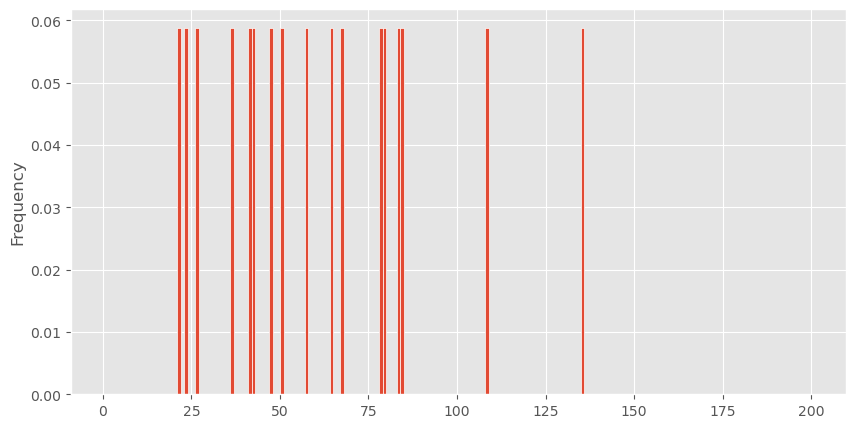

In [8]:
plot_serial_numbers(observations)

***Verificando sua resposta***: seu histograma deve ter barras com a mesma altura, e o eixo x deve variar de 0 a 200!

#### **Pergunta 2.4.** 

Como estamos tentando estimar o máximo da população, `N`, uma estatística natural a ser utilizada como nosso estimador é o **máximo amostral**. Dessa forma, podemos estimar o número total de tanques como sendo o maior número de série contido em nossa amostra.

Escreva abaixo uma função chamada `calculate_max_based_estimate` que calcula essa estatística em uma determinada `Series` de números de série, da seguinte forma:

1. Essa função deve tomar como argumento uma `Series` de números de série;
1. Ao invocarmos essa função, ela deve retornar o máximo da `Series` dada como argumento.

In [9]:
def calculate_max_based_estimate(nums):
    return(nums.max())

#### **Pergunta 2.5.** 

Invoque a função `calculate_max_based_estimate` definida na Pergunta 2.4. na célula de código abaixo para calcular uma estimativa de `N` usando os números de série em `observations`. Chame o resultado de `max_based_estimate`.

In [10]:
max_based_estimate = calculate_max_based_estimate(observations)
max_based_estimate

serial_number    135
dtype: int64

#### **Pergunta 2.6.** 

Sob as hipóteses feitas acima (veja as referências para mais detalhes), uma outra maneira de estimarmos `N` é tomar **duas vezes a média** dos números de série contidos em nossa amostra.

Escreva abaixo uma função chamada `calculate_mean_based_estimate` que calcula essa estatística, da seguinte forma:

1. Essa função deve tomar como argumento uma `Series` de números de série;
1. Ao invocarmos essa função, ela deve retornar o dobro da média da `Series` dada como argumento.

In [11]:
def calculate_mean_based_estimate(nums):
    return(2*nums.mean())

#### **Pergunta 2.7.** 

Invoque a função `calculate_mean_based_estimate` definida na Pergunta 2.6. na célula de código abaixo para calcular uma estimativa de `N` usando os números de série em `observations`. Chame o resultado de `mean_based_estimate`.

In [12]:
mean_based_estimate = calculate_mean_based_estimate(observations)
mean_based_estimate

serial_number    122.470588
dtype: float64

#### **Pergunta 2.8.** 

Veja abaixo os valores de `max_based_estimate` e `mean_based_estimate`.

In [13]:
max_based_estimate

serial_number    135
dtype: int64

In [14]:
mean_based_estimate

serial_number    122.470588
dtype: float64

Refletindo um pouco sobre os valores dessas estimativas e as definições de suas estatísticas correspondentes, é possível que `mean_based_estimate` seja _exatamente_ igual a `N` (suponha que antes arredondemos `mean_based_estimate` para o inteiro mais próximo)? Caso contrário, ainda é possível dizer se `mean_based_estimate` é maior ou menor que `N`? Preencha a célula de texto abaixo com as afirmativas **verdadeiras**.

**A**. Sim, `mean_based_estimate` pode ser igual a `N`.

**B**. Não, `mean_based_estimate` não pode ser igual a `N`, e é definitivamente menor em aproximadamente 3 unidades.

**C**. Não, `mean_based_estimate` não pode ser igual a `N`, e é definitivamente menor em pelo menos 12 unidades.

**D**. Não, `mean_based_estimate` não pode ser igual a `N`, e é definitivamente maior em aproximadamente 3 unidades.

**E**. Não, `mean_based_estimate` não pode ser igual a `N`, e é definitivamente maior em pelo menos 12 unidades.

**F**. Não, `mean_based_estimate` não pode ser igual a `N`, mas também não podemos dizer se é menor ou maior.

> **F**.

## 3. Bootstrapping 🥾

Após calcularmos as estimativa pontuais para `N` dadas em `max_based_estimate` ou `mean_based_estimate`, não podemos afirmar com certeza se essas estimativas são "iguais" ou mesmo "próximas" ao parâmetro populacional `N`, porque `N` é desconhecido!

Nesta seção, vamos então quantificar a incerteza (ou aferir a precisão) sobre nossas estimativas.

#### **Pergunta 3.1.** 

Escreva uma função abaixo chamada `simulate_resample`, da seguinte forma:

1. Essa função não deve receber argumentos e deve gerar uma nova amostra (**com reposição**) a partir dos números de série contidos em `observations`;
2. Ao invocarmos essa função, ela deve retornar essa nova amostra na forma de um `DataFrame`.

_<ins> Dica</ins>_: Use o método `.sample`.

In [15]:
def simulate_resample():
    return(observations.sample(n = num_observations, replace = True))

#### **Pergunta 3.2.** 

Invoque a função `simulate_resample` definida na Pergunta 3.1. na célula de código abaixo para gerar uma reamostra de `observations`. Chame o resultado de `one_resample`.

_<ins> Dica</ins>_: fixe a semente aleatória com `np.random.seed(123)` no cabeçalho da célula para garantir reproducibilidade!

In [16]:
## Para garantir reproducibilidade
np.random.seed(123)

one_resample = simulate_resample()
one_resample

,serial_number
13,108
2,57
2,57
6,36
10,41
1,42
0,47
15,50
9,135
0,47


#### **Pergunta 3.3.** 

Faça um histograma de `one_resample` produzida na Pergunta 3.2. **e** um histograma separado das observações originais em `observations` nas 2 células de código que seguem abaixo.

**Importante**: Para essa pergunta, certifique-se de usar a função `plot_serial_numbers` que você definiu na Pergunta 2.2.

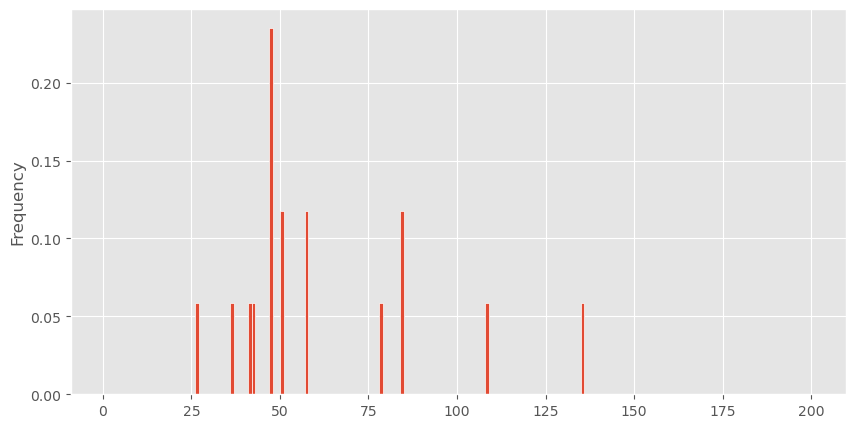

In [17]:
## Histograma da reamostragem
plot_serial_numbers(one_resample)

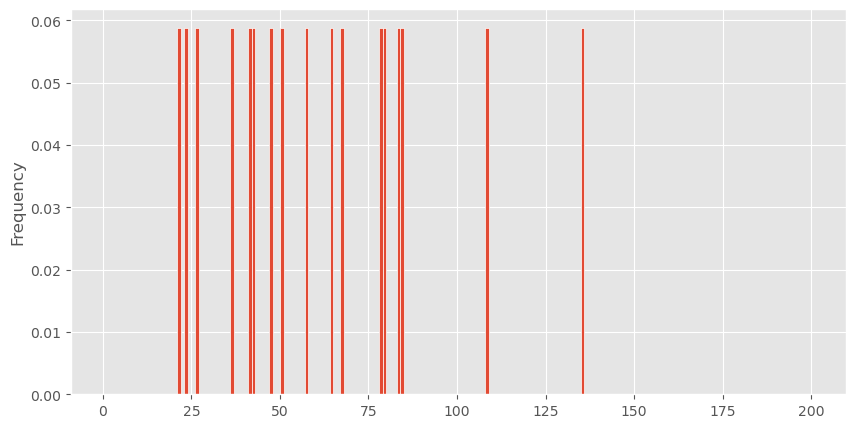

In [18]:
## Histogram das observações originais
plot_serial_numbers(observations)

#### **Pergunta 3.4.**

Com base nos histogramas produzidos na Pergunta 3.3., preencha a célula de texto abaixo com as afirmativas **verdadeiras**.

**A**. No histograma de `one_resample`, não há barras em locais que não existem no histograma de `observations`.

**B**. No histograma de `observations`, não há barras em locais que não existem no histograma de `one_resample`.

**C**. Não existem números de série duplicados em `one_resample`.

**D**. Não existem números de série duplicados em `observations`.

> **B** e **D**.

#### **Pergunta 3.5.**

Crie mais 2 reamostras abaixo utilizando a função `simulate_resample` definida na Pergunta 3.1. Elabore um histograma e calcule as estimativas baseadas no máximo e na média de cada reamostra, printando os resultados correspondentes.

Estimativa baseada na média da reamostra 1: serial_number    128.823529
dtype: float64
Estimativa baseada no máximo do reamostra 1: serial_number    135
dtype: int64


Estimativa baseada na média da reamostra 2: serial_number    106.823529
dtype: float64
Estimativa baseada no máximo do reamostra 2: serial_number    108
dtype: int64




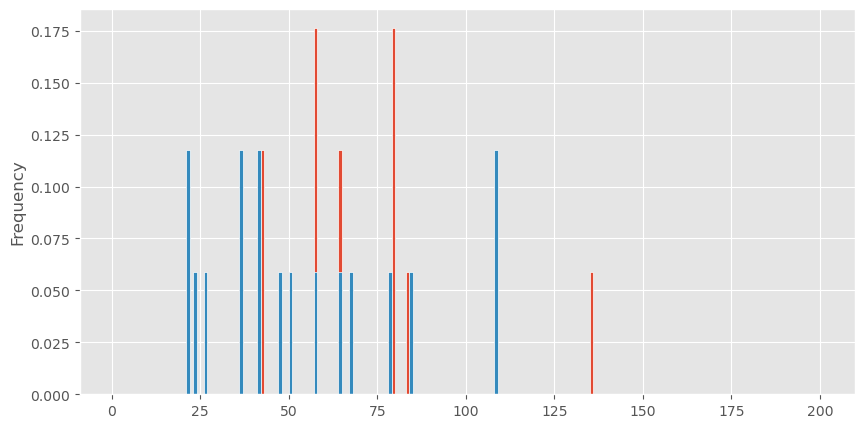

In [19]:
## Nota: aqui utilizamos np.arange(2) no loop abaixo pois queremos duas reamostras
## --- Alternativamente, poderíamos também usar range(2)

## Loop principal
for i in np.arange(2):
    resample = simulate_resample()

    ## Plote o histograma dessa reamostra
    plot_serial_numbers(resample)

    ## Calcule as estimativas baseadas na média e no máximo dessa reamostra
    mean_based_estimate_resample = calculate_mean_based_estimate(resample)
    max_based_estimate_resample = calculate_max_based_estimate(resample)

    ## Faça o print dos resultados!
    print(f"Estimativa baseada na média da reamostra {i + 1}:", mean_based_estimate_resample)
    print(f"Estimativa baseada no máximo do reamostra {i + 1}:", max_based_estimate_resample)
    print('\n')

**_Verificando sua resposta_**: existe uma alta probabilidade de que `max_based_estimate_resample` seja _exatamente_ igual a 135, mais de uma vez! (execute a célula acima algumas vezes e você quase certamente verá isso acontecer). 

- Por outro lado, em geral as `mean_based_estimate_resample`'s quase sempre serão distintas, e também diferentes de `mean_based_estimate` (a estimativa dada na Pergunta 2.7., calculada com base na amostra original).

#### **Pergunta 3.5.**

Discorra brevemente na célula de texto abaixo sobre porque você acha razoável que `max_based_estimate_resample` seja exatamente igual em reamostras diferentes. O que isso te diz sobre a eficácia do bootstrap para esse tipo de estatística? 

> ...

#### **DESAFIO.**

Calcule a probabilidade _exata_ de que uma estimativa baseada no máximo de uma reamostra de nossa amostra seja igual a 135. Escreva o resultado na célula de texto abaixo.

**Nota**: esta é uma questão de **probabilidade** (e logo de **matemática**), não de programação!

_<ins> Dica</ins>_:  Lembre que aqui $n = 17$, e tente pensar na probabilidade de _qualquer_ um dos elementos da nossa reamostra ser igual a 135.

**_Verificando sua resposta_**: a probabilidade em questão é maior do que 60%.

> ...

## 4. Intervalos de Confiança 📓

Agora, vamos aplicar toda a parte de bootstrap desenvolvida acima para finalmente aproximar a distribuição amostral das estatísticas acima e quantificar nossa incerteza sobre as estimativas de `N`!

#### **Pergunta 4.1.**

Escreva uma função abaixo chamada `simulate_estimates`, da seguinte forma:

1. Essa função deve receber 4 argumentos:
    - `original_df`: um `DataFrame` do qual os dados devem ser amostrados, com uma coluna chamada `'serial_number'`;
    - `sample_size`: o tamanho amostral $n$ de cada amostra, isto é, um número inteiro (por exemplo o número de linhas em `original_df`);
    - `statistic`: uma **função** que calcula uma estatística em uma amostra (mais especificamente, tome `statistic` como o **nome de uma função** que recebe uma `Series` de números de série como argumento e retorne um número, como por exemplo `calculate_mean_based_estimate`);
    - `repetitions`: o número de repetições $B$ a serem realizadas (ou seja, o número de reamostras que vamos criar).
<!---->
1. Ao invocarmos essa função, ela deve simular $B = $ `repetitions` amostras **com reposição** de tamanho `sample_size` do `DataFrame` `original_df` fornecido como argumento;
1. Para cada uma das amostras produzidas, a função deve calcular e armazenar o valor da estatística `statistic` correspondente, e armazenar esse valor em um `Array`.
1. A função deve retornar o `Array` contendo o valor da estatística `statistic` calculada para cada reamostra (isso implica que o comprimento do `Array` retornado deve ser igual a `repetitions`).

In [20]:
def simulate_estimates(original_df, sample_size, statistic, repetitions):
    ## Inicialização
    boot_dist = np.array([])

    ## Loop principal
    for i in np.arange(repetitions):
        resample = original_df.sample(n = sample_size, replace = True)
        estimate = statistic(resample)
        boot_dist = np.append(boot_dist, estimate)

    ## Return
    return(boot_dist)

#### **Pergunta 4.2.**

Utilize o código abaixo para testar sua implementação da função `simulate_estimates` definida na Pergunta 4.1.

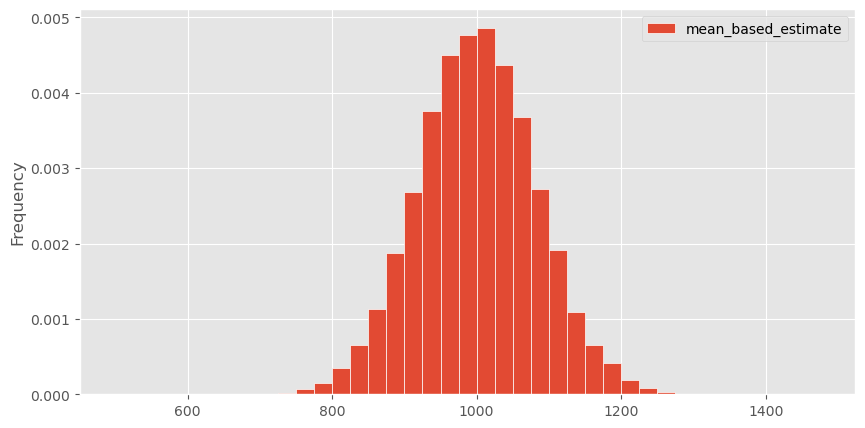

In [21]:
## O código abaixo deve gerar um histograma com `mean_based_estimates`
## de B = 10.000 exemplos de tamanho n = 50 de uma amostra aleatória uniforme com `N` = 1000
example_estimates = simulate_estimates(
    pd.DataFrame({"serial_number" : np.arange(1, 1000 + 1)}),
    50,
    calculate_mean_based_estimate,
    10000)

## Descomente e execute
pd.DataFrame({"mean_based_estimate" : example_estimates}).plot(kind = 'hist', density = True, bins = np.arange(500, 1500, 25), ec = 'w');

***Verificando sua resposta***: o histograma elaborado acima deve ser uma curva em forma de sino centrada em `N`= 1.000, com a maior parte de sua massa no intervalo [800, 1.200].

Agora podemos voltar à amostra que realmente observamos (`observations`) e estimar o quanto nossa estimativa de `N` baseada na média varia de amostra para amostra.

#### **Pergunta 4.3.**

Utilizando um bootstrap com $B = 5.000$ repetições na nossa amostra `observations`, construa uma distribuição amostral empírica para as **estimativas baseadas na média** (`mean_based_estimate`'s) para `N`, e armazene as estimativas em `bootstrap_estimates`.

_<ins> Dica</ins>_: O procedimento acima deve retornar um `Array`, e requer apenas _uma linha de código_; basta invocar sua função `simulate_estimates`!

In [22]:
bootstrap_estimates = simulate_estimates(observations, num_observations, calculate_mean_based_estimate, 5000)
bootstrap_estimates

array([117.29411765, 133.17647059, 108.70588235, ..., 141.64705882,
       125.52941176, 132.23529412])

#### **Pergunta 4.4.**

Elabore um histograma na célula de código abaixo para visualizar a distribuição bootsrap em `bootstrap_estimates` construída na Pergunta 4.3.

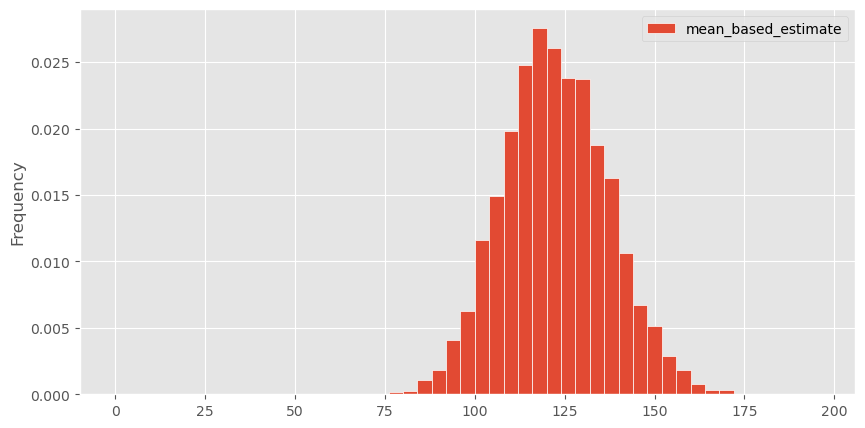

In [23]:
## Descomente e execute
pd.DataFrame({"mean_based_estimate" : bootstrap_estimates}).plot(kind = 'hist', density=True, bins = np.arange(0, 200, 4), ec = 'w');

#### **Pergunta 4.5.**

Calcule um intervalo de 95\% de confiança para `N` com base na distribuição bootstrap em `bootstrap_estimates` construída na Pergunta 4.3.

_<ins> Dica</ins>_: use [`np.percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) aqui, e assegure-se de tomar dois percentis $a < b$ cuja _soma_ das respectivas àrea à esquerda de $a$ e à direita de $b$ sejam iguais a 5\%.

In [24]:
## Descomente e execute
L = np.percentile(bootstrap_estimates, 2.5)
U = np.percentile(bootstrap_estimates, 97.5)
print("Intervalo de 95% de confiança bootstrap: [{:f}, {:f}]".format(L, U))

Intervalo de 95% de confiança bootstrap: [94.941176, 152.005882]


#### **Pergunta 4.6.**

Na célula de código abaixo, sobreponha o intervalo de 95\% de confiança para `N` calculado na Pergunta 4.5. ao histograma elaborado na Pergunta 4.3.

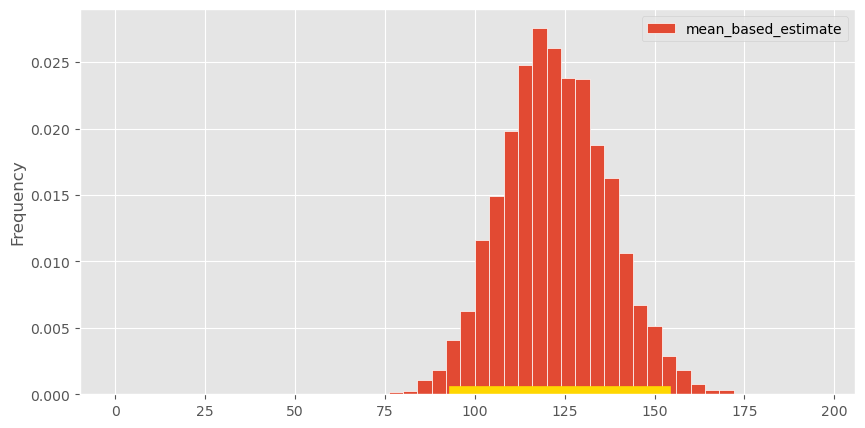

In [25]:
pd.DataFrame({"mean_based_estimate" : bootstrap_estimates}).plot(kind = 'hist', density=True, bins = np.arange(0, 200, 4), ec = 'w');
plt.plot([L, U], [0, 0], color = 'gold', linewidth = 12, label = '95% percentile interval', zorder = 2);

**_Verificando seu resultado_**: seu intervalo de confiança deve cobrir aproximadamente 95% da área do histograma acima!

## 5. Com ou sem reposição? 🔂

Cada vez que reamostramos da nossa amostra original, fazemos essa reamostragem **com reposição**. O que aconteceria então se tentássemos reamostrar _sem reposição_? 🤔

Primeiramente, vamos começar mais uma vez com nossa amostra original, `observations`:

In [26]:
observations

,serial_number
0,47
1,42
2,57
3,79
4,26
5,23
6,36
7,64
8,83
9,135


#### **Pergunta 5.1.**

Na célula de código abaixo, reamostre `observations` $B = 5.000$ vezes, mas dessa vez **sem reposição**. Calcule a estimativa baseada na média `calculate_mean_based_estimate` (definida na Pergunta 2.6) em cada reamostra, e armazene as estimativas no `Array` `estimates_without_replacement`.

**Importante**: você **não** pode usar sua função `simulate_estimates` aqui, porque ela faz reamostragem _com reposição_! 

_<ins> Dica</ins>_: porém, você pode **sim** copiar e colar a maior parte do código...

In [27]:
## Inicialização
estimates_without_replacement = np.array([])

## Loop principal
for i in np.arange(5000):
    resample = observations.sample(n = num_observations, replace = False)['serial_number']
    estimate = calculate_mean_based_estimate(resample)
    estimates_without_replacement = np.append(estimates_without_replacement, estimate)

estimates_without_replacement

array([122.47058824, 122.47058824, 122.47058824, ..., 122.47058824,
       122.47058824, 122.47058824])

#### **Pergunta 5.2.**

Se você completou a Pergunta 5.1 corretamente, notará que todas as $B = 5.000$ estimativas são _idênticas_ e equivalem a aproximadamente 122,4706.

Este número é igual à estimativa `mean_based_estimate` calculada na Pergunta 2.7:

In [28]:
mean_based_estimate

serial_number    122.470588
dtype: float64

Isto é, todos os valores na distribuição bootstrap construída sem reposição são _exatamente iguais_ à estimativa feita com base na amostra original!

In [29]:
calculate_mean_based_estimate(observations)

serial_number    122.470588
dtype: float64

Faça uma breve reflexão na célula de texto abaixo sobre porque devemos **sempre** reamostrar com reposição ao realizarmos um bootstrap. 

_<ins> Dica</ins>_: pense na seguinte pergunta: "se aqui nosso objetivo principal ao realizarmos um bootstrap é caracterizarmos a incerteza acerca da nossa estimativa pontual original através de uma distribuição (a distribuição bootstrap), qual o valor desse procedimento se todos os valores dessa distribuição são iguais?!"

> ...

<!-- COMEÇAR PERGUNTA -->

<!--
COMEÇAR PERGUNTA
nome: q4_2
manual: verdadeiro
-->

## Linha de chegada 🏁

Parabéns! Você concluiu o Laboratório 5 com sucesso 👏👏👏

Para enviar sua tarefa:

1. Selecione `Kernel -> Restart Kernel and Run All Cells` para garantir que você executou todas as células, incluindo as células de teste.
1. Leia o notebook do começo ao fim com cuidado para ter certeza de que está tudo bem e que todos os testes foram aprovados.
1. Baixe seu notebook usando `File -> Save and Export Notebook As -> HTML` e, em seguida, carregue seu notebook para o Moodle.